<a href="https://colab.research.google.com/github/netajik/thesis/blob/master/convex_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Visualize a Convex Set

In [ ]:
pip install numpy matplotlib


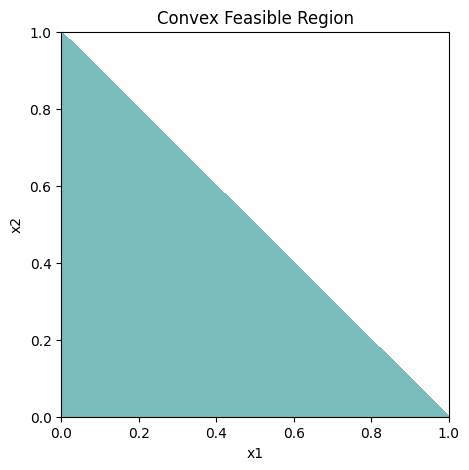

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 400)
y = np.linspace(0, 1, 400)
X, Y = np.meshgrid(x, y)

Z = X + Y <= 1

plt.figure(figsize=(5,5))
plt.contourf(X, Y, Z, levels=[0.5, 1], alpha=0.6)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Convex Feasible Region")
plt.show()


Convex Combination Test

In [ ]:
x1 = np.array([0.2, 0.3])
x2 = np.array([0.6, 0.2])

thetas = np.linspace(0, 1, 10)

for t in thetas:
    x = t*x1 + (1-t)*x2
    feasible = (x[0] >= 0) and (x[1] >= 0) and (x.sum() <= 1)
    print(t, x, feasible)


0.0 [0.6 0.2] True
0.1111111111111111 [0.55555556 0.21111111] True
0.2222222222222222 [0.51111111 0.22222222] True
0.3333333333333333 [0.46666667 0.23333333] True
0.4444444444444444 [0.42222222 0.24444444] True
0.5555555555555556 [0.37777778 0.25555556] True
0.6666666666666666 [0.33333333 0.26666667] True
0.7777777777777777 [0.28888889 0.27777778] True
0.8888888888888888 [0.24444444 0.28888889] True
1.0 [0.2 0.3] True


Non-Convex Counterexample

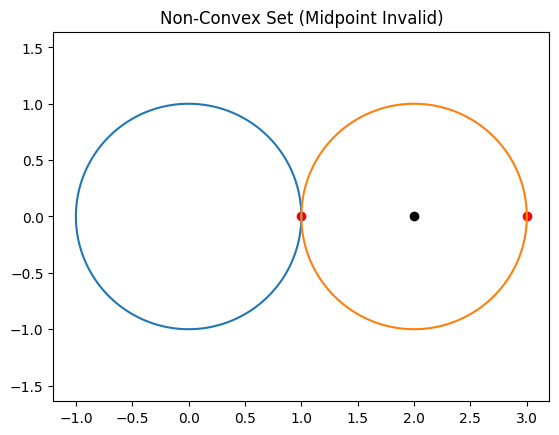

In [ ]:
# Two disjoint circles
theta = np.linspace(0, 2*np.pi, 200)
c1 = np.c_[np.cos(theta), np.sin(theta)]
c2 = np.c_[2 + np.cos(theta), np.sin(theta)]

plt.plot(c1[:,0], c1[:,1])
plt.plot(c2[:,0], c2[:,1])

# Pick one point from each
x1 = np.array([1, 0])
x2 = np.array([3, 0])

mid = 0.5*(x1 + x2)

plt.scatter(*x1, color='red')
plt.scatter(*x2, color='red')
plt.scatter(*mid, color='black')

plt.axis("equal")
plt.title("Non-Convex Set (Midpoint Invalid)")
plt.show()


Visual Convexity Check

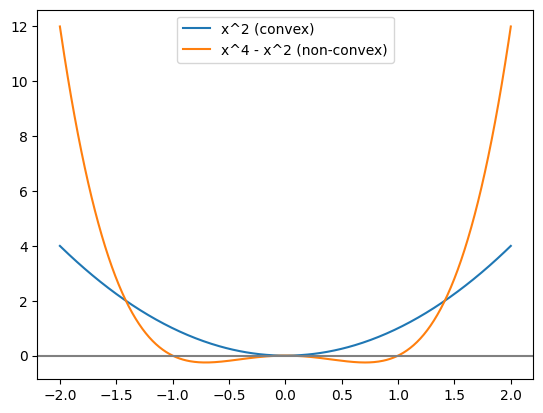

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2, 2, 400)
f1 = x**2
f2 = x**4 - x**2

plt.plot(x, f1, label="x^2 (convex)")
plt.plot(x, f2, label="x^4 - x^2 (non-convex)")
plt.legend()
plt.axhline(0,color='gray')
plt.show()


Jensen’s Inequality Test

In [ ]:
x = np.random.randn(1000)
lhs = (x.mean())**2
rhs = np.mean(x**2)

print(lhs, rhs)  # lhs <= rhs always


0.0005104910717374878 1.0037028446264418


Least Squares Optimization

In [ ]:
import cvxpy as cp
import numpy as np

# Data
A = np.array([[1,1],[1,2],[1,3]])
b = np.array([1,2,2])

# Variable
x = cp.Variable(2)

# Objective
objective = cp.Minimize(cp.sum_squares(A @ x - b))

# Problem
prob = cp.Problem(objective)
prob.solve()

print("Optimal x:", x.value)


Optimal x: [0.66666667 0.5       ]


Linear Programming

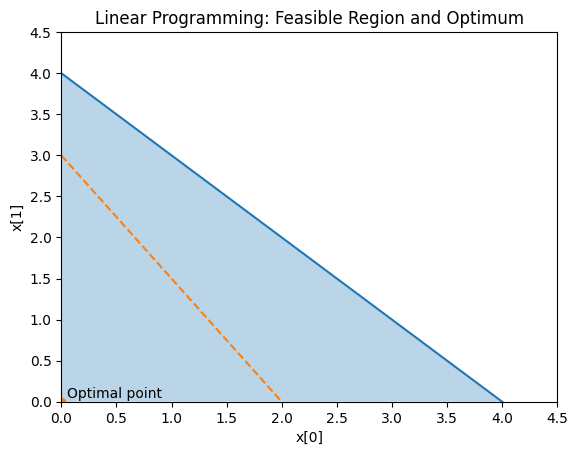

In [ ]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Solve the LP
# -----------------------------
x = cp.Variable(2)

objective = cp.Minimize(3*x[0] + 2*x[1])
constraints = [
    x[0] >= 0,
    x[1] >= 0,
    x[0] + x[1] <= 4
]

prob = cp.Problem(objective, constraints)
prob.solve()

x_opt = x.value  # optimal solution

# -----------------------------
# Plot the feasible region
# -----------------------------
x0 = np.linspace(0, 4, 400)
x1_boundary = 4 - x0  # x0 + x1 = 4

plt.figure()

# Feasible region
plt.fill_between(x0, 0, x1_boundary, alpha=0.3)

# Constraint boundary
plt.plot(x0, x1_boundary)

# Optimal point
plt.scatter(x_opt[0], x_opt[1])
plt.text(x_opt[0] + 0.05, x_opt[1] + 0.05, "Optimal point")

# Objective level line: 3x + 2y = c
c = 6
x1_obj = (c - 3*x0) / 2
plt.plot(x0, x1_obj, linestyle="--")

plt.xlabel("x[0]")
plt.ylabel("x[1]")
plt.xlim(0, 4.5)
plt.ylim(0, 4.5)
plt.title("Linear Programming: Feasible Region and Optimum")
plt.show()


Quadratic Programming

Polishing not needed - no active set detected at optimal point
Optimal x: [1.  2.5]


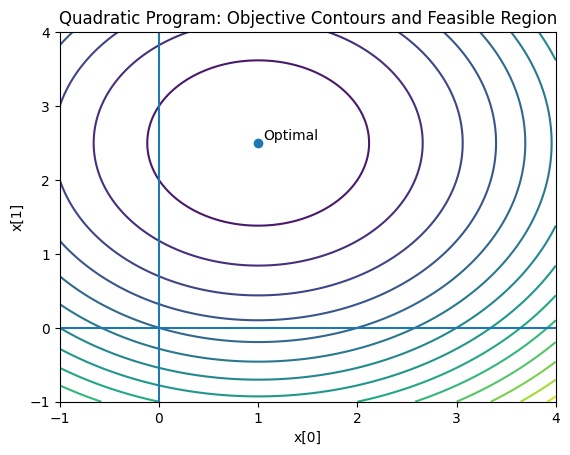

In [ ]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Problem data
# -----------------------------
Q = np.array([[2, 0],
              [0, 2]])
c = np.array([-2, -5])

x = cp.Variable(2)

objective = cp.Minimize(0.5 * cp.quad_form(x, Q) + c @ x)
constraints = [x >= 0]

prob = cp.Problem(objective, constraints)
prob.solve()

x_opt = x.value
print("Optimal x:", x_opt)

# -----------------------------
# Plot
# -----------------------------
x1 = np.linspace(-1, 4, 400)
x2 = np.linspace(-1, 4, 400)
X1, X2 = np.meshgrid(x1, x2)

# Objective function
Z = (
    0.5 * (2*X1**2 + 2*X2**2)
    - 2*X1
    - 5*X2
)

plt.figure()

# Objective contours
plt.contour(X1, X2, Z, levels=20)

# Feasible region boundaries (x >= 0)
plt.axvline(0)
plt.axhline(0)

# Optimal point
plt.scatter(x_opt[0], x_opt[1])
plt.text(x_opt[0] + 0.05, x_opt[1] + 0.05, "Optimal")

plt.xlabel("x[0]")
plt.ylabel("x[1]")
plt.title("Quadratic Program: Objective Contours and Feasible Region")
plt.xlim(-1, 4)
plt.ylim(-1, 4)

plt.show()


LASSO (ℓ₁ Regularization)

Sparse x: [0.33333333 0.625     ]


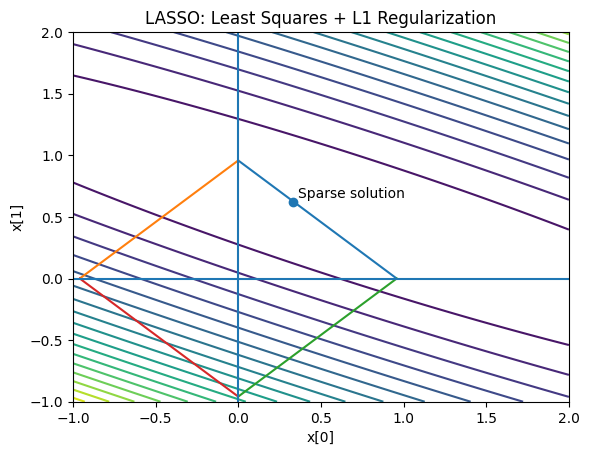

In [ ]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[1,1],[1,2],[1,3]])
b = np.array([1,2,2])
lam = 0.5

# Solve LASSO
x = cp.Variable(2)
objective = cp.Minimize(cp.sum_squares(A @ x - b) + lam * cp.norm(x, 1))
prob = cp.Problem(objective)
prob.solve()

x_opt = x.value
print("Sparse x:", x_opt)

# Plot geometry
x1 = np.linspace(-1, 2, 400)
x2 = np.linspace(-1, 2, 400)
X1, X2 = np.meshgrid(x1, x2)

# Least squares loss (no L1)
Z = (
    (A[0,0]*X1 + A[0,1]*X2 - b[0])**2 +
    (A[1,0]*X1 + A[1,1]*X2 - b[1])**2 +
    (A[2,0]*X1 + A[2,1]*X2 - b[2])**2
)

plt.figure()
plt.contour(X1, X2, Z, levels=20)

# L1 ball
c = np.linalg.norm(x_opt, 1)
plt.plot([0, c], [c, 0])
plt.plot([0, -c], [c, 0])
plt.plot([0, c], [-c, 0])
plt.plot([0, -c], [-c, 0])

# Optimal point
plt.scatter(x_opt[0], x_opt[1])
plt.text(x_opt[0]+0.03, x_opt[1]+0.03, "Sparse solution")

plt.axhline(0)
plt.axvline(0)
plt.xlabel("x[0]")
plt.ylabel("x[1]")
plt.title("LASSO: Least Squares + L1 Regularization")
plt.show()
